In [2]:
import sympy as sp

sp.init_printing()

o = sp.Symbol('omega', positive=True)
a = sp.Symbol('alpha', positive=True)
A = sp.Symbol('A', positive=True)
B = sp.Symbol('B', positive=True)
g = sp.Symbol('gamma', positive=True)
b = sp.Symbol('b', positive=True)
l = sp.Symbol('lambda')
z,x= sp.symbols('z x')

In [3]:
z**4 + b*z**2 - l

In [4]:
C1, C2, C3, C4 = sp.symbols('C_1 C_2 C_3 C_4')

Формулы для выражения корней через коэффициенты:

# Случай $\pm i \omega$, $\pm i \alpha$

In [5]:
sp.collect(sp.expand((z-sp.I*a)*(z+sp.I*a)*(z-sp.I*o)*(z+sp.I*o)), z)

In [6]:
gen_sol_1 = C1*sp.cos(a*x)+C2*sp.sin(a*x)+C3*sp.cos(o*x)+C4*sp.sin(o*x)
lhs1 = sp.Matrix([sp.diff(gen_sol_1, x).subs([(x, 0)]),
          sp.diff(gen_sol_1, x, x, x).subs([(x, 0)]),
          sp.diff(gen_sol_1, x, x).subs([(x, 1)]),
          sp.diff(gen_sol_1, x, x, x).subs([(x, 1)]),])
chpoly1 = sp.det((lhs1.jacobian([C1, C2, C3, C4])))
(chpoly1)

In [7]:
chpolyImaginaryPair = sp.lambdify([a, o], chpoly1)

In [8]:
print(sp.solve([a**2+o**2 - b,
          a**2*o**2+l],[a, o], dict=True)[7])

{omega: sqrt(b/2 - sqrt(b**2 + 4*lambda)/2), alpha: sqrt(b/2 + sqrt(b**2 + 4*lambda)/2)}


Эти формулы работают и дают положительные числа при $-\frac{b^2}{4} < \lambda < 0$

# Случай $\pm i \alpha$, $\pm \gamma$

In [9]:
sp.collect(sp.expand((z-g)*(z+g)*(z-sp.I*a)*(z+sp.I*a)), z)

In [10]:
gen_sol_2 = C1*sp.cos(a*x)+C2*sp.sin(a*x)+C3*sp.cosh(g*x)+C4*sp.sinh(g*x)
(gen_sol_2)

In [11]:
lhs2 = sp.Matrix([sp.diff(gen_sol_2, x, x).subs([(x, 1), (C2, 0), (C4, 0)]),
          sp.diff(gen_sol_2, x, x, x).subs([(x, 1)]),])


chpoly2 = sp.det((lhs2.jacobian([C1, C3])))
print(chpoly2)

-alpha**3*gamma**2*sin(alpha)*cosh(gamma) - alpha**2*gamma**3*cos(alpha)*sinh(gamma)


In [12]:
chpolyComplexReal = sp.lambdify((a, g), chpoly2)

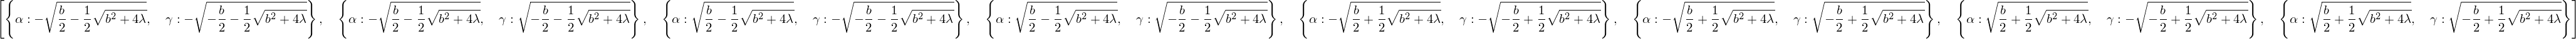

In [13]:
sp.solve([a**2-g**2 - b,
          l - a**2*g**2], [a, g], dict=True)

Эти формулы работают при $\lambda > 0$

In [14]:
print(sp.solve([a**2-g**2 - b,
          l - a**2*g**2], [a, g], dict=True)[7])

{gamma: sqrt(-b/2 + sqrt(b**2 + 4*lambda)/2), alpha: sqrt(b/2 + sqrt(b**2 + 4*lambda)/2)}


# Случай $\pm a \pm b i$

In [15]:
sp.collect(sp.expand((z-(A+sp.I*B))*(z-(A-sp.I*B))*(z-(-A+sp.I*B))*(z-(-A-sp.I*B))), z)

При $\lambda <-\frac{b^2}{4}$

In [16]:
gen_sol_3 = C1*sp.exp(A*x)*sp.cos(B*x)+C2*sp.exp(A*x)*sp.sin(B*x)+C3*sp.exp(-A*x)*sp.cos(B*x)+C4*sp.exp(-A*x)*sp.sin(B*x)
(gen_sol_3)

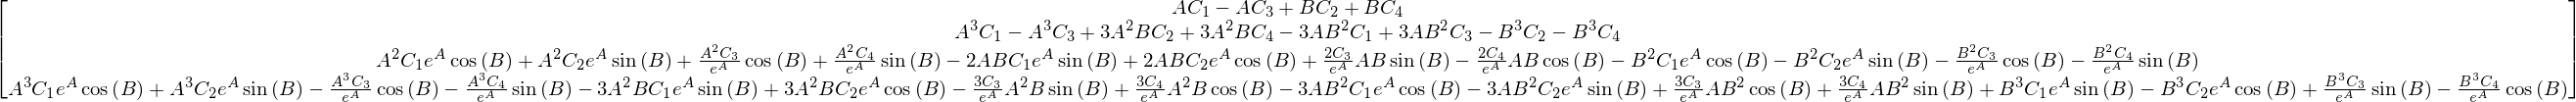

In [17]:
lhs3 = sp.Matrix([sp.diff(gen_sol_3, x).subs([(x, 0)]),
          sp.diff(gen_sol_3, x, x, x).subs([(x, 0)]),
          sp.diff(gen_sol_3, x, x).subs([(x, 1)]),
          sp.diff(gen_sol_3, x, x, x).subs([(x, 1)]),])
(lhs3)

In [18]:
chpoly3 = sp.det((lhs3.jacobian([C1, C2, C3, C4])))
print(chpoly3)

-8*A**8*B*sin(B)*cos(B) - 2*A**7*B**2*exp(2*A)*sin(B)**2 - 2*A**7*B**2*exp(2*A)*cos(B)**2 + 2*A**7*B**2*exp(-2*A)*sin(B)**2 + 2*A**7*B**2*exp(-2*A)*cos(B)**2 - 24*A**6*B**3*sin(B)*cos(B) - 6*A**5*B**4*exp(2*A)*sin(B)**2 - 6*A**5*B**4*exp(2*A)*cos(B)**2 + 6*A**5*B**4*exp(-2*A)*sin(B)**2 + 6*A**5*B**4*exp(-2*A)*cos(B)**2 - 24*A**4*B**5*sin(B)*cos(B) - 6*A**3*B**6*exp(2*A)*sin(B)**2 - 6*A**3*B**6*exp(2*A)*cos(B)**2 + 6*A**3*B**6*exp(-2*A)*sin(B)**2 + 6*A**3*B**6*exp(-2*A)*cos(B)**2 - 8*A**2*B**7*sin(B)*cos(B) - 2*A*B**8*exp(2*A)*sin(B)**2 - 2*A*B**8*exp(2*A)*cos(B)**2 + 2*A*B**8*exp(-2*A)*sin(B)**2 + 2*A*B**8*exp(-2*A)*cos(B)**2


In [19]:
chpolyAllComplex = sp.lambdify((A, B), chpoly3)

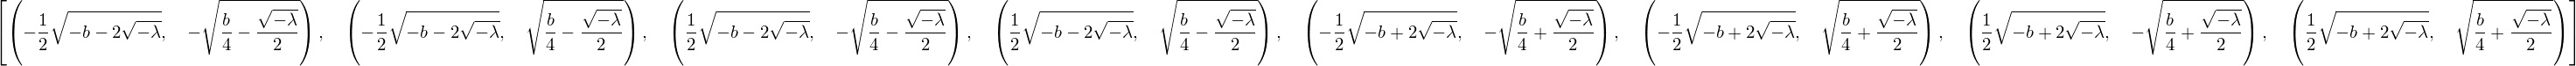

In [20]:
sp.solve([2*B**2-2*A**2 - b,
          (A**2+B**2)**2+l], [A, B])

Формулы, описывающие удобное решение:

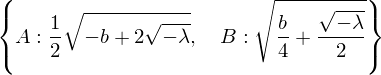

In [21]:
(sp.solve([2*B**2-2*A**2 - b,
          (A**2+B**2)**2+l], [A, B], dict=True)[7])

# Построение карты собственных значений

In [22]:
import numpy as np

N = 3001
M = 2001
bs = np.linspace(0.0 , 1.0, N)
ls = np.linspace(-0.3, 0.01, M)

In [23]:
caseImaginaryPairsDets = np.zeros((M, N))
caseComplexRealDets = np.zeros((M, N))
caseAllComplexDets = np.zeros((M, N))

In [ ]:
for j, bb in enumerate(bs):
    for i, ll in enumerate(ls):
        caseImaginaryPairsDets[i, j] = np.nan
        caseComplexRealDets[i, j] = np.nan
        caseAllComplexDets[i, j] = np.nan
        if ll > 0:
            GG,AA = np.sqrt(-bb/2 + np.sqrt(bb**2 + 4*ll)/2), np.sqrt(bb/2 + np.sqrt(bb**2 + 4*ll)/2)
            caseComplexRealDets[i, j] = chpolyComplexReal(AA, GG)
        elif ll < - bb**2/4.0:
            BB, AA = np.sqrt(bb/4 + np.sqrt(-ll)/2), np.sqrt(-bb + 2*np.sqrt(-ll))/2
            caseAllComplexDets[i, j] = chpolyAllComplex(AA, BB)
        elif ((ll > -bb**2/4.0) and (ll < 0)):
            OO, AA = np.sqrt(bb/2 - np.sqrt(bb**2 + 4*ll)/2),  np.sqrt(bb/2 + np.sqrt(bb**2 + 4*ll)/2)
            caseImaginaryPairsDets[i, j] = chpolyImaginaryPair(AA,OO)

In [ ]:
import matplotlib.pyplot as plt

plt.contour(bs, ls, caseAllComplexDets, [-0.0001, 0.0001], colors='red')
#plt.contourf(bs, ls, caseComplexRealDets, [-0.001, 0.001], colors='blue')
plt.contour(bs, ls, caseImaginaryPairsDets, [-0.0001, 0.0001], colors='green')
plt.xlabel('$b$')
plt.ylabel('$\lambda$')
_, xmax = plt.xlim();
ymin, ymax = plt.ylim();
plt.plot(bs, [-bb**2/4.0 for bb in bs], 'k--')
plt.ylim([ymin, ymax]);

# Брутфорсовая проверка разрешимости задачи на собственные числа с отрицательным $\lambda$ при положительном $b$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

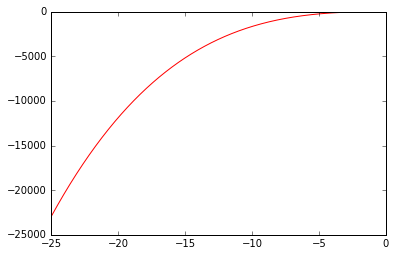

In [29]:
bb = 0.1
detAllComplex = []
range1 = np.linspace(-25, -bb**2/4.0, 1000, endpoint=False)
for ll in range1:
    BB, AA = np.sqrt(bb/4 + np.sqrt(-ll)/2), np.sqrt(-bb + 2*np.sqrt(-ll))/2
    detAllComplex.append(chpolyAllComplex(AA, BB))

detImaginaryPair = []
range2 = np.linspace(-bb**2/4.0+0.001, 0.0, 1000, endpoint=False)
for ll in range2:
    OO, AA = np.sqrt(bb/2 - np.sqrt(bb**2 + 4*ll)/2),  np.sqrt(bb/2 + np.sqrt(bb**2 + 4*ll)/2)
    detImaginaryPair.append(chpolyImaginaryPair(AA,OO))
    
plt.plot(range1, detAllComplex, 'r')


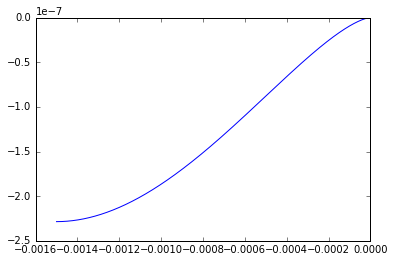

In [30]:
plt.plot(range2, detImaginaryPair, 'b')